In [11]:
!pip install "numpy<2.0" --upgrade

!pip uninstall matplotlib -y
!pip uninstall pandas -y
!pip uninstall scikit-learn -y
!pip install --no-cache-dir matplotlib
!pip install --no-cache-dir pandas
!pip install --no-cache-dir scikit-learn



import numpy as np
print(np.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 520.6 kB/s eta 0:00:0000:0100:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.26.4-cp313-cp313-macosx_14_0_arm64.whl size=4680547 sha256=40f879f25ca7fff3d2f34c4e9c2a979cd5df1f543850b5abc4b469dec629ba4c
  Stored in directory: /Users/chandrikasanjay/Library/Caches/pip/wheels/8b/2d/9f/b6b46373f328e2ef50388915d351ccacbedac929459b5459bf
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Found existing installation: matplotlib 3.10.3
Uninstalling matplotlib-3.10.3:
  Successfully uninstalled matplotlib-3.10.3
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installati

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
# Load dataset
df = pd.read_csv("mat_health.csv")  # Replace with your actual dataset file

# Handling missing values (optional, remove or impute missing values)
df = df.dropna()

# Encoding categorical features if needed
categorical_cols = ["Previous Complications", "Preexisting Diabetes", "Gestational Diabetes", "Mental Health", "Risk Level"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for decoding predictions later

# Define features and target
X = df.drop(columns=["Risk Level"])  # Features
y = df["Risk Level"]  # Target variable

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (recommended for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/chandrikasanjay/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/chandrikasanjay/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/chandrikasanjay/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in st

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

🔹 Logistic Regression Model
Accuracy: 0.9786
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.99      0.98      0.98       148

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234

------------------------------------------------------------
🔹 Decision Tree Model
Accuracy: 0.9786
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.98      0.99      0.98       148

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234

------------------------------------------------------------
🔹 Random Forest Model
Accuracy: 0.9915
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   

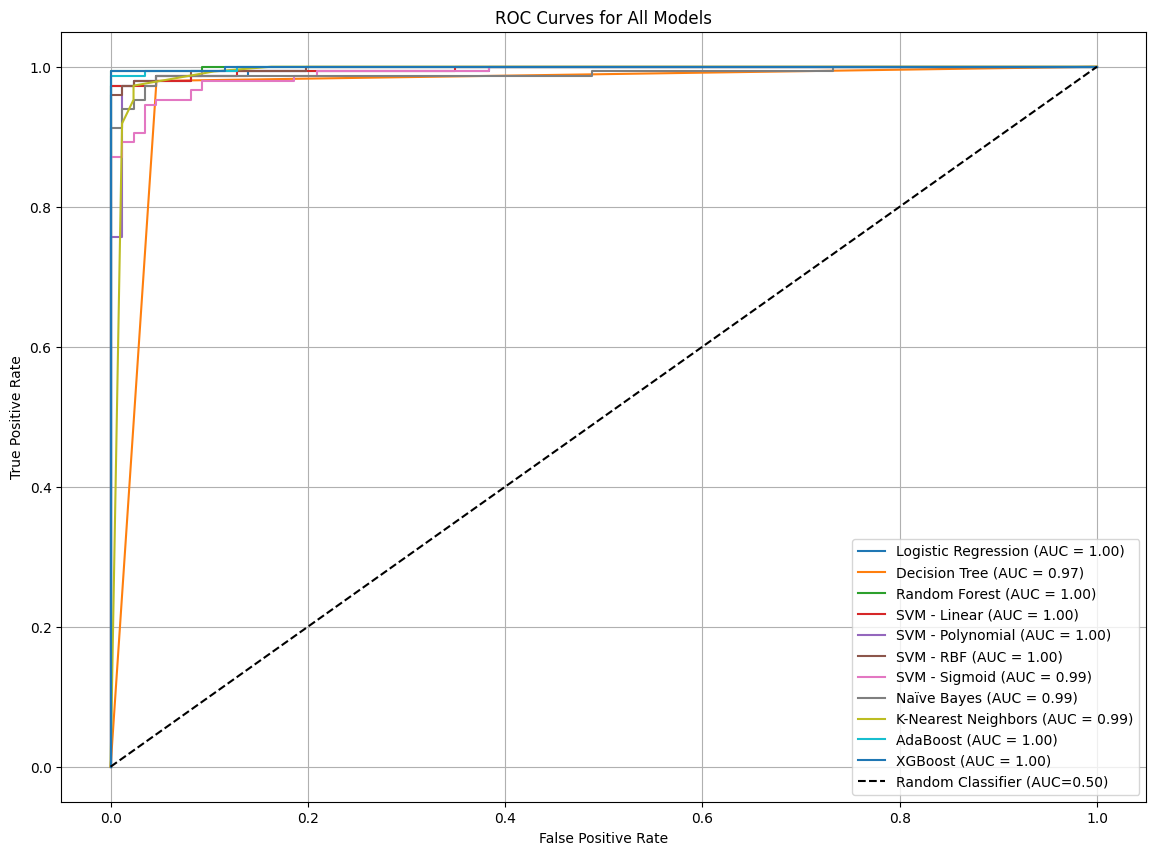

In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "SVM - Linear": SVC(kernel="linear"),
    "SVM - Polynomial": SVC(kernel="poly", degree=3),
    "SVM - RBF": SVC(kernel="rbf"),
    "SVM - Sigmoid": SVC(kernel="sigmoid"),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"🔹 {name} Model")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Binarize y_test if it's not already binary (important for ROC)
# Ensure y_train and y_test are properly encoded if needed

plt.figure(figsize=(14, 10))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model has predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = y_pred  # fallback, not ideal for ROC

    # ROC Curve and AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    print(f"🔹 {name} Model")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Plot formatting
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC=0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline

# ---------- 1. Stacking ----------
stack_estimators = [
    ("rf", RandomForestClassifier(n_estimators=150, random_state=42)),
    ("svc", SVC(kernel="rbf", probability=True)),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
]

stacking = StackingClassifier(
    estimators=stack_estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True         # keep original features alongside meta‑features
)
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
print("🔹 Stacking")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))
print("-"*60)

# ---------- 2. Voting – Hard ----------
hard_voting = VotingClassifier(
    estimators=[
        ("rf", models["Random Forest"]),
        ("svc", models["SVM - RBF"]),
        ("knn", models["K-Nearest Neighbors"])
    ],
    voting="hard"
)
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
print("🔹 Hard Voting")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))
print("-"*60)

# ---------- 3. Voting – Soft ----------
soft_voting = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=150, random_state=42)),
        ("svc", SVC(kernel="rbf", probability=True)),   # probability=True required
        ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
    ],
    voting="soft",           # average predicted class‑probabilities
    weights=[2, 1, 2]        # optional: favour stronger base models
)
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)
print("🔹 Soft Voting")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))
print("-"*60)


ModuleNotFoundError: No module named 'sklearn'

🔹 Logistic Regression Model
Average Precision Score: 0.9979
------------------------------------------------------------
🔹 Decision Tree Model
Average Precision Score: 0.9817
------------------------------------------------------------
🔹 Random Forest Model
Average Precision Score: 0.9997
------------------------------------------------------------
🔹 SVM - Linear Model
Average Precision Score: 0.9979
------------------------------------------------------------
🔹 SVM - Polynomial Model
Average Precision Score: 0.9970
------------------------------------------------------------
🔹 SVM - RBF Model
Average Precision Score: 0.9986
------------------------------------------------------------
🔹 SVM - Sigmoid Model
Average Precision Score: 0.9946
------------------------------------------------------------
🔹 Naïve Bayes Model
Average Precision Score: 0.9953
------------------------------------------------------------
🔹 K-Nearest Neighbors Model
Average Precision Score: 0.9908
------------------

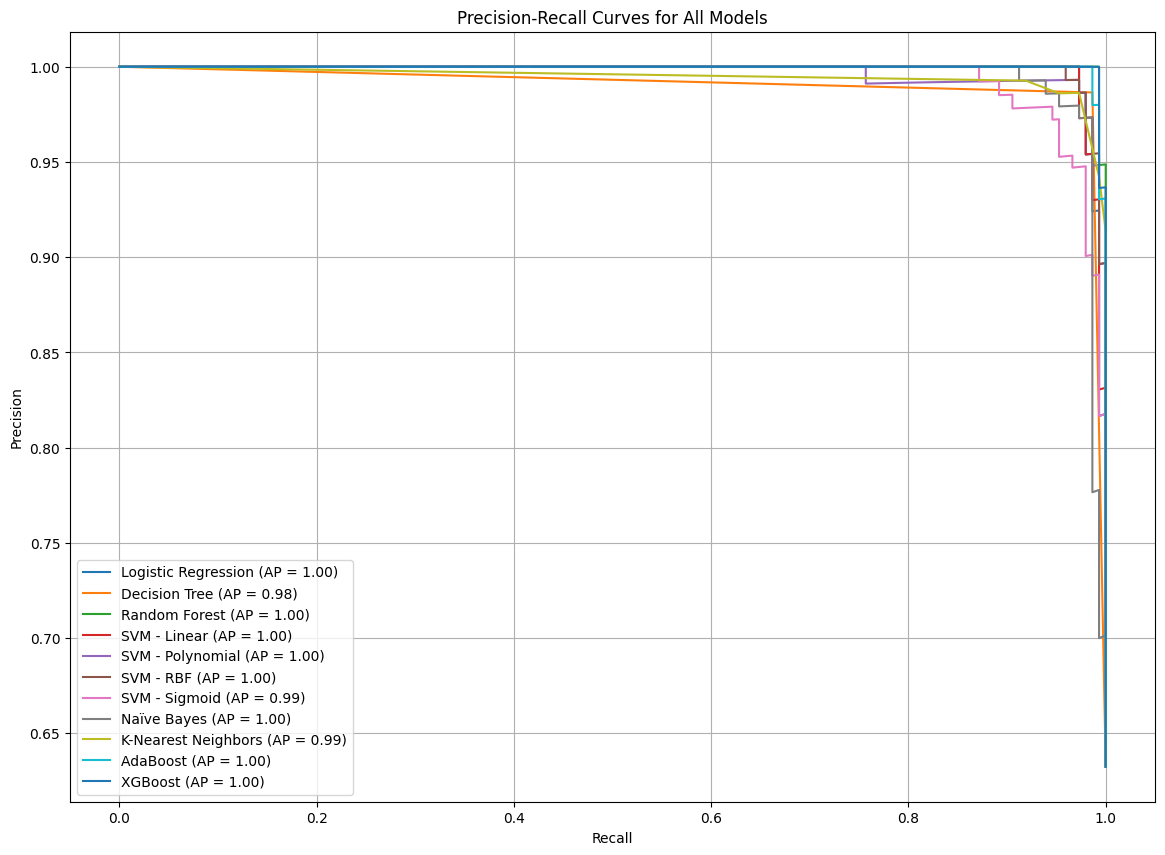

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(14, 10))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Get prediction scores for PR curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = y_test  # fallback

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

    print(f"🔹 {name} Model")
    print(f"Average Precision Score: {avg_precision:.4f}")
    print("-" * 60)

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="lower left")
plt.grid()
plt.show()


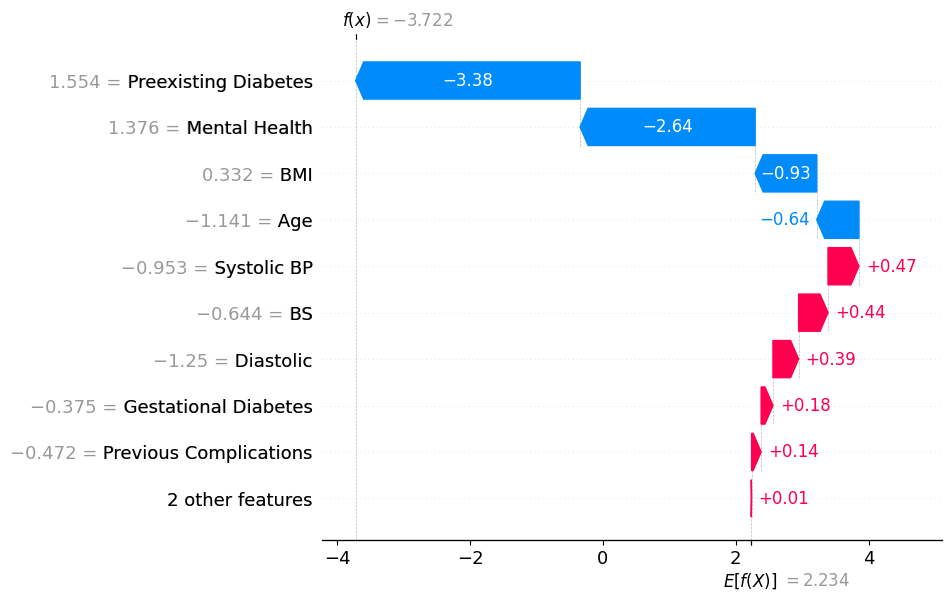

In [ ]:
import shap
import pandas as pd

feature_names = [
    "Age", "Systolic BP", "Diastolic", "BS", "Body Temp", "BMI",
    "Previous Complications", "Preexisting Diabetes", "Gestational Diabetes",
    "Mental Health", "Heart Rate"
]

X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)


# Choose one tree-based model (like XGBoost)
import shap
from xgboost import XGBClassifier

# Train your model (or reuse existing one)
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Choose an instance
instance_index = 0
instance = X_test.iloc[instance_index]

# Waterfall Plot
shap.plots.waterfall(shap_values[instance_index])

# Force Plot (interactive, best in Jupyter)
shap.plots.force(shap_values[instance_index])



In [ ]:
import shap
from xgboost import XGBClassifier
import pandas as pd

# Feature names
feature_names = [
    "Age", "Systolic BP", "Diastolic", "BS", "Body Temp", "BMI",
    "Previous Complications", "Preexisting Diabetes", "Gestational Diabetes",
    "Mental Health", "Heart Rate", "Risk Level"
]

# Wrap the feature arrays into DataFrames if not already
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Train the model (if not already trained)
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Choose a test instance to explain
instance_index = 0  # change index as needed

# Initialize JS for interactive force plot
shap.initjs()

# Display force plot
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[instance_index].values,
    features=X_test.iloc[instance_index],
    feature_names=X_test.columns
)


In [ ]:
!pip3 install feyn

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

100%|██████████| 50/50 [00:09<00:00,  5.40it/s]


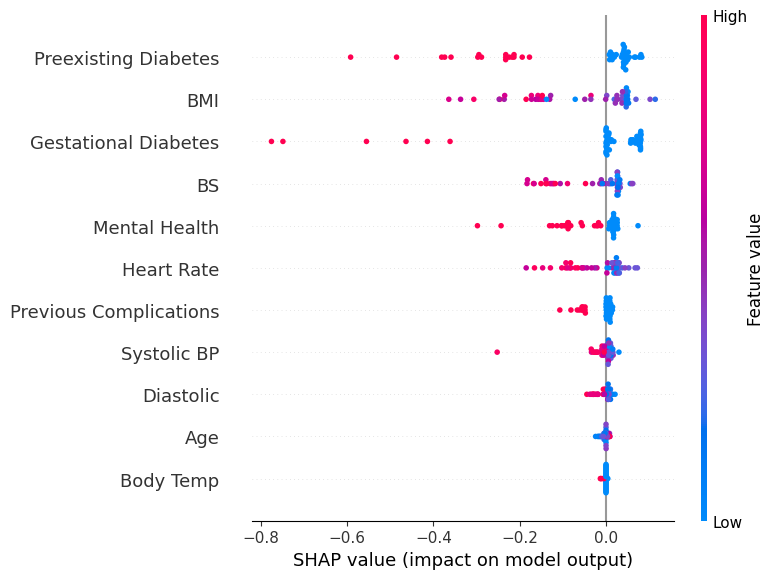

AssertionError: Feature and SHAP matrices must have the same number of rows!

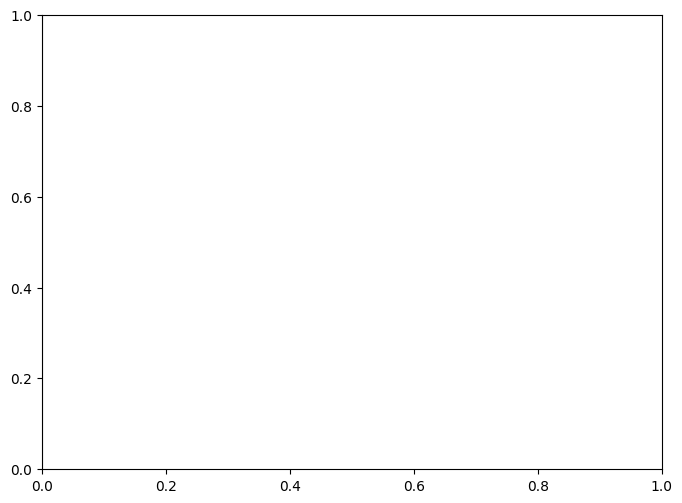

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Select the best-performing model (Random Forest in this case)
best_model = models["Random Forest"]

# # Create a SHAP explainer
# explainer = shap.TreeExplainer(best_model)

# # Compute SHAP values for test data
# shap_values = explainer.shap_values(X_test)
# explainer = shap.TreeExplainer(best_model)
# shap_values = explainer.shap_values(X_test).values
explainer = shap.KernelExplainer(best_model.predict, X_train[:50])  # Use a small sample
shap_values = explainer.shap_values(X_test[:50])  # Compute for a small batch

# Plot summary
shap.summary_plot(shap_values, X_test[:50], feature_names=X.columns)

# Ensure the correct class is selected (for multi-class models)
if isinstance(shap_values, list):  
    shap_values = shap_values[1]
    print("SHAP values shape:", np.shape(shap_values))
    print("X_test shape:", np.shape(X_test))
  # Select SHAP values for class 1

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Summary plot: Shows overall feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()

# Individual force plot for the first test sample
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], matplotlib=True)


_IncompleteInputError: incomplete input (3034263905.py, line 44)

Feature Importance in Random Forest:
                   Feature  Importance
7     Preexisting Diabetes    0.218003
5                      BMI    0.185278
3                       BS    0.183797
10              Heart Rate    0.139534
9            Mental Health    0.082653
8     Gestational Diabetes    0.081373
6   Previous Complications    0.041084
2                Diastolic    0.021993
0                      Age    0.021199
1              Systolic BP    0.019153
4                Body Temp    0.005933


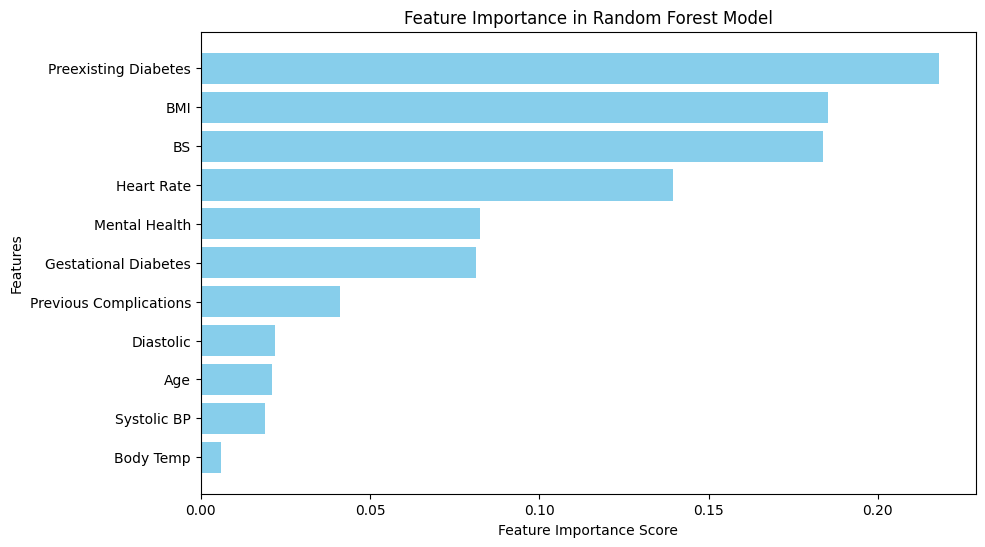

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure X_train is a DataFrame
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance in Random Forest:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature names as per the given order
feature_names = [
    "Age", "Systolic BP", "Diastolic", "BS", "Body Temp", "BMI", 
    "Previous Complications", "Preexisting Diabetes", "Gestational Diabetes", 
    "Mental Health", "Heart Rate", "Risk Level"
]

# Generate synthetic data (replace with actual dataset)
X = np.random.rand(100, len(feature_names))  # 100 samples, 12 features
y = np.random.randint(0, 2, 100)  # Binary classification

# Convert to DataFrame with named columns
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train model
models["Random Forest"].fit(X_train, y_train)

# LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=['Low Risk', 'High Risk'],  # Adjust as per your classification
    mode='classification'
)

# Explain a prediction
i = 0  # Choose a test sample index
exp = explainer.explain_instance(X_test.iloc[i], models["Random Forest"].predict_proba)
exp.show_in_notebook()  # For Jupyter Notebook


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

In [ ]:
import pandas as pd
import numpy as np
!pip install feyn
from feyn import QLattice
from sklearn.model_selection import train_test_split

# Define feature names in the specified order
feature_names = [
    "Age", "Systolic BP", "Diastolic", "BS", "Body Temp", "BMI", 
    "Previous Complications", "Preexisting Diabetes", "Gestational Diabetes", 
    "Mental Health", "Heart Rate", "Risk Level"
]

# Generate synthetic data (replace with actual dataset)
X = np.random.rand(100, len(feature_names))  # 100 samples, 12 features
y = np.random.randint(0, 2, 100)  # Binary classification (0 = Low Risk, 1 = High Risk)

# Convert X to a DataFrame with named columns
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train to DataFrame with target
df = X_train.copy()
df['Risk_Level'] = y_train  # Add target variable

# Initialize QLattice
ql = QLattice()

# Generate models using QLattice
ql_models = ql.auto_run(df, output_name='Risk_Level')

# Select the best model
best_model = ql_models[0]
print(best_model)

# Make predictions on test set
predictions = best_model.predict(X_test)

# Display results
print("Predictions:", predictions[:10])  # Show first 10 predictions


ERROR: Could not find a version that satisfies the requirement feyn (from versions: none)
ERROR: No matching distribution found for feyn


ModuleNotFoundError: No module named 'feyn'